# ERT (Electrical Resistivity Tomography) 
**Some Basics**


Author: Emmanuel Castillo

emmanuel.castillotaborda@utdallas.edu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ert

# CMD

In [2]:
print(help(ert.parse_cmd))

Help on function parse_cmd in module ert:

parse_cmd(file_path, debug=False)
    Parses a structured geophysical input file into header metadata and tabular data for geometry and commands.
    
    Sections:
        :header   -> key = value pairs
        :geometry -> 4-column comma-separated numerical data
        :commands -> 12-column comma-separated numerical data
    
    Parameters
    ----------
    file_path : str
        Path to the input file.
    debug : bool
        If True, prints debug information.
        Default is False.
    
    Returns
    -------
    dict
        A dictionary with:
            'header'   : dict of key-value pairs (str -> str),
            'geometry' : pd.DataFrame with 4 columns,
            'commands' : pd.DataFrame with 12 columns

None


In [3]:
# Load the CMD file
cmd_filepath = "../data/ROC_ERT_032625/ROC2025.cmd"
cmd = ert.parse_cmd(cmd_filepath)

# Display tables in Jupyter or script
print("Header:")
for key, value in cmd['header'].items():
    print(f"{key}: {value}")

print("\nGeometry Data:")
print(cmd['geometry'].head())

print("\nCommands Data:")
print(cmd['commands'].head())

Header:
progID: schl+dd
type: R
arraytype: 3
Binf: 0
Ninf: 0
MUX: 0

Geometry Data:
    x1   x2   x3   x4
0  1.0  0.0  0.0  0.0
1  2.0  1.0  0.0  0.0
2  3.0  2.0  0.0  0.0
3  4.0  3.0  0.0  0.0
4  5.0  4.0  0.0  0.0

Commands Data:
     A    B   P1   P2   P3   P4   P5   P6   P7   P8   P9  channels
0  2.0  1.0  3.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1.0
1  2.0  1.0  4.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1.0
2  2.0  1.0  5.0  6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1.0
3  2.0  1.0  6.0  7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1.0
4  2.0  1.0  7.0  8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1.0


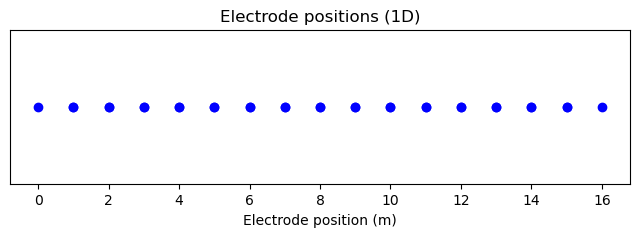

In [4]:
geometry = cmd['geometry']
import matplotlib.pyplot as plt

# Flatten the electrode positions into one array
electrode_positions = list(geometry['x1']) + list(geometry['x2'])

plt.figure(figsize=(8, 2))
plt.scatter(electrode_positions, [1]*len(electrode_positions), c='blue')
plt.yticks([])
plt.xlabel('Electrode position (m)')
plt.title('Electrode positions (1D)')
plt.show()

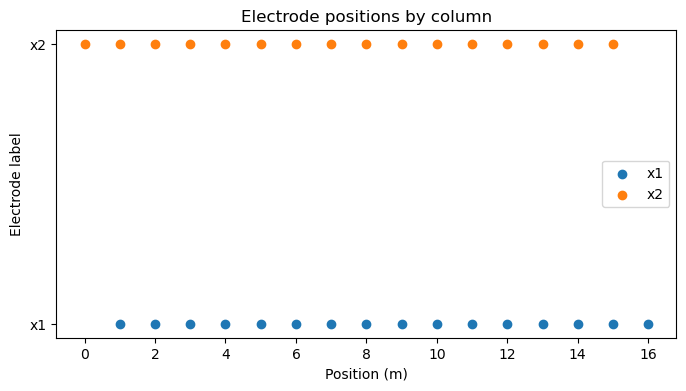

In [5]:
plt.figure(figsize=(8, 4))
for col in ['x1', 'x2']:
    plt.scatter(geometry[col], [col]*len(geometry), label=col)

plt.xlabel('Position (m)')
plt.ylabel('Electrode label')
plt.title('Electrode positions by column')
plt.legend()
plt.show()

In [6]:
commands = cmd["commands"]
display(commands.head())

,A,B,P1,P2,P3,P4,P5,P6,P7,P8,P9,channels
0,2.0,1.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,1.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,1.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,1.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,1.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# STG (IMPORTANT)

In [7]:
print(help(ert.parse_stg))

Help on function parse_stg in module ert:

parse_stg(filepath, join_date_time=True)
    Read a .stg file exported from SuperSting and return a pandas DataFrame.
    
    Parameters:
        filepath (str): Path to the .stg file.
        join_date_time (bool): If True, combine date and time into a single datetime object in 'date_time' column.
    
    Returns:
        pd.DataFrame: Parsed .stg data.

None


In [8]:

stg_filepath = "../data/ROC_ERT_032625/ROC2025.stg"

# Load the STG file
stg = ert.parse_stg(stg_filepath)
print(stg.head())
print(stg.columns)
stg.to_csv("stg.csv", index=False)

   record_num  user           date_time       V/I  error_percent_tenths  \
0           1  USER 2025-03-26 10:07:56  0.564647                    19   
1           2  USER 2025-03-26 10:08:18  0.123888                    32   
2           3  USER 2025-03-26 10:08:40  0.052938                    50   
3           4  USER 2025-03-26 10:09:03  0.031073                    58   
4           5  USER 2025-03-26 10:09:25  0.011693                    19   

   current_mA  resistivity command_id   Ax   Ay  ...   Nz  ip_time_slot_ms  \
0         299      15.9650    ROC2025  1.5  0.0  ...  0.0              100   
1         301      14.0114    ROC2025  1.5  0.0  ...  0.0              100   
2         303      14.9679    ROC2025  1.5  0.0  ...  0.0              100   
3         304      17.5715    ROC2025  1.5  0.0  ...  0.0              100   
4         305      11.5712    ROC2025  1.5  0.0  ...  0.0              100   

   ip_time_constant  ip_slot1  ip_slot2  ip_slot3  ip_slot4  ip_slot5  \
0      

Review the summary. (Notice the values of Ay, Az,By,Bz,My, Mz)

In [9]:
stg[["current_mA","resistivity","Ax","Ay","Az","Bx","By","Bz","Mx","My","Mz","Nx","Ny","Nz"]].describe()

,current_mA,resistivity,Ax,Ay,Az,Bx,By,Bz,Mx,My,Mz,Nx,Ny,Nz
count,170.000000,170.000000,170.000000,170.0,170.0,170.000000,170.0,170.0,170.000000,170.0,170.0,170.000000,170.0,170.0
mean,349.052941,14.305113,7.641176,0.0,0.0,8.611765,0.0,0.0,13.305882,0.0,0.0,15.441176,0.0,0.0
std,34.393178,16.024277,4.543421,0.0,0.0,6.560315,0.0,0.0,4.657242,0.0,0.0,4.956564,0.0,0.0
min,262.000000,-94.752200,0.000000,0.0,0.0,0.000000,0.0,0.0,1.500000,0.0,0.0,3.000000,0.0,0.0
25%,321.000000,11.884000,4.500000,0.0,0.0,3.000000,0.0,0.0,10.500000,0.0,0.0,12.000000,0.0,0.0
50%,349.000000,14.579700,7.500000,0.0,0.0,7.500000,0.0,0.0,13.500000,0.0,0.0,16.500000,0.0,0.0
75%,370.000000,16.509450,10.500000,0.0,0.0,13.500000,0.0,0.0,16.500000,0.0,0.0,19.500000,0.0,0.0
max,452.000000,101.551000,19.500000,0.0,0.0,22.500000,0.0,0.0,21.000000,0.0,0.0,22.500000,0.0,0.0


let's check the resistivity. Negative values usually indicate: Instrumental error, bad or noisy data (e.g., poor electrode contact or external interference)

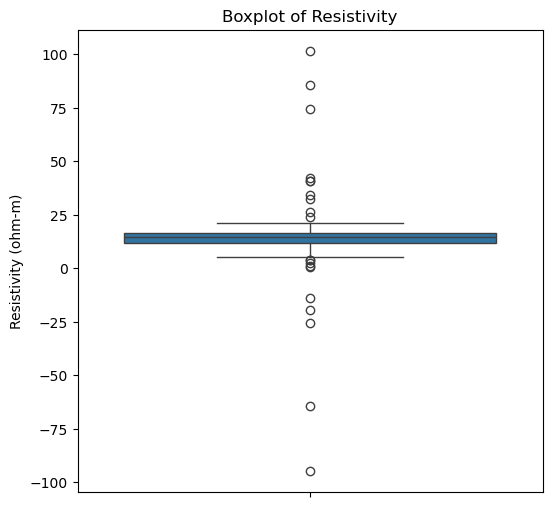

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.boxplot(y=stg['resistivity'].dropna())
plt.title("Boxplot of Resistivity")
plt.ylabel("Resistivity (ohm-m)")
plt.show()

Some other stats

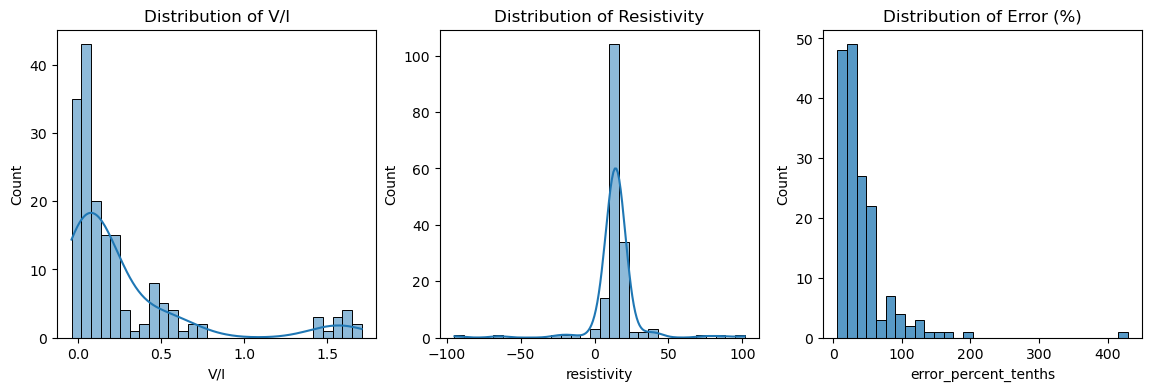

In [11]:
# 1. Distribution plots
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.histplot(stg['V/I'], bins=30, kde=True)
plt.title('Distribution of V/I')

plt.subplot(1,3,2)
sns.histplot(stg['resistivity'], bins=30, kde=True)
plt.title('Distribution of Resistivity')

plt.subplot(1,3,3)
sns.histplot(stg['error_percent_tenths'], bins=30, kde=False)
plt.title('Distribution of Error (%)')
plt.show()

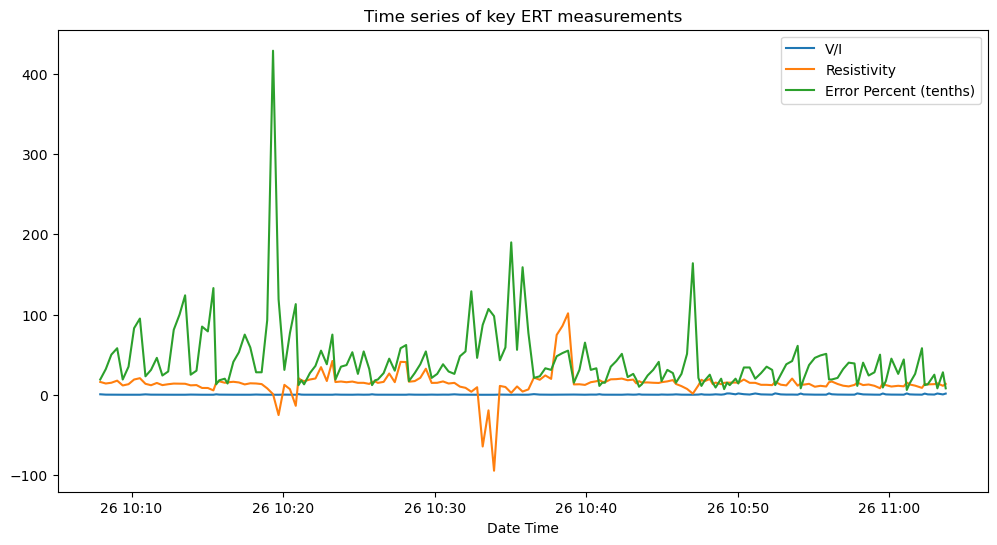

In [12]:
# Time series plots 
plt.figure(figsize=(12,6))
plt.plot(stg['date_time'], stg['V/I'], label='V/I')
plt.plot(stg['date_time'], stg['resistivity'], label='Resistivity')
plt.plot(stg['date_time'], stg['error_percent_tenths'], label='Error Percent (tenths)')
plt.legend()
plt.xlabel('Date Time')
plt.title('Time series of key ERT measurements')
plt.show()

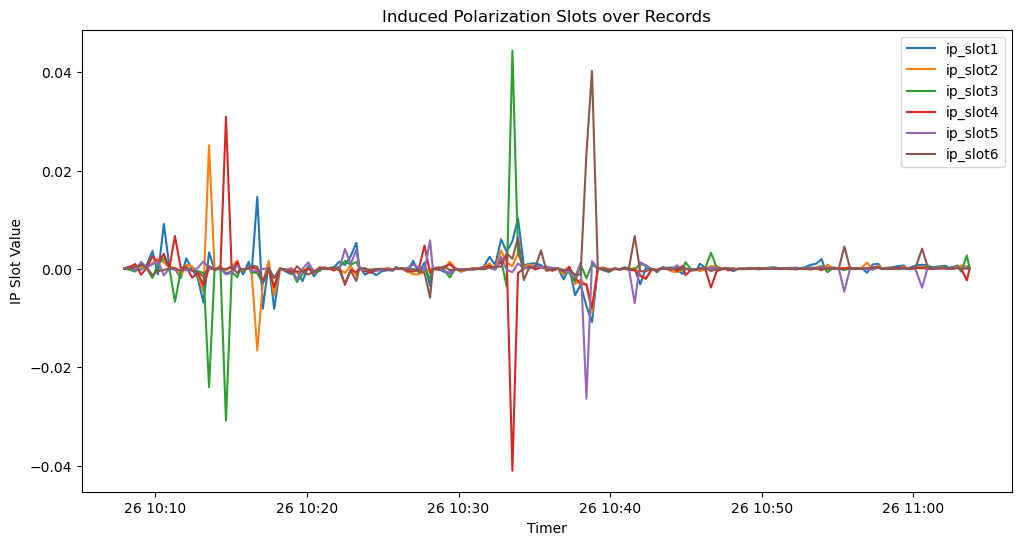

In [13]:
# IP slot values over time
plt.figure(figsize=(12,6))
for slot in ['ip_slot1', 'ip_slot2', 'ip_slot3', 'ip_slot4', 'ip_slot5', 'ip_slot6']:
    plt.plot(stg['date_time'], stg[slot], label=slot)
plt.xlabel('Timer')
plt.ylabel('IP Slot Value')
plt.title('Induced Polarization Slots over Records')
plt.legend()
plt.show()

# CRS

In [14]:
print(help(ert.parse_crs))

Help on function parse_crs in module ert:

parse_crs(file_path, join_date_time=True)
    Reads a .crs contact resistance file.
    
    Parameters
    ----------
    file_path : str or Path
        Path to the .crs file.
    join_date_time : bool, default=True
        If True, combines date and time into a single datetime column 'date_time'.
        Otherwise, returns separate 'date' (datetime.date) and 'time' (datetime.time) columns.
    
    Returns
    -------
    pd.DataFrame
        Parsed contact resistance data.

None


In [15]:
# Display the first few rows of the CRS data
crs_filepath = "../data/ROC_ERT_032625/ROC2025.crs"

# Load the crs file
crs = ert.parse_crs(crs_filepath)
print(crs.head())

            date_time  RecNo  Vcode      Curr      Res  AddrA  AddrB   Ax  \
0 2025-03-26 10:07:56      1    206  0.298558  1103.22      2      1  1.5   
1 2025-03-26 10:08:18      2    206  0.301278  1093.26      2      1  1.5   
2 2025-03-26 10:08:40      3    206  0.302748  1087.94      2      1  1.5   
3 2025-03-26 10:09:03      4    206  0.303879  1083.89      2      1  1.5   
4 2025-03-26 10:09:25      5    206  0.304780  1080.69      2      1  1.5   

    Ay   Az   Bx   By   Bz  
0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  


# ERT Analysis

## Theoretical Pseudocode Plot

array([<Axes: title={'center': 'Wenner Pseudosection'}, ylabel='Pseudo-depth (m)'>,
       <Axes: title={'center': 'Dipoledipole Pseudosection'}, ylabel='Pseudo-depth (m)'>,
       <Axes: title={'center': 'Schlumberger Pseudosection'}, xlabel='Distance (m)', ylabel='Pseudo-depth (m)'>],
      dtype=object)

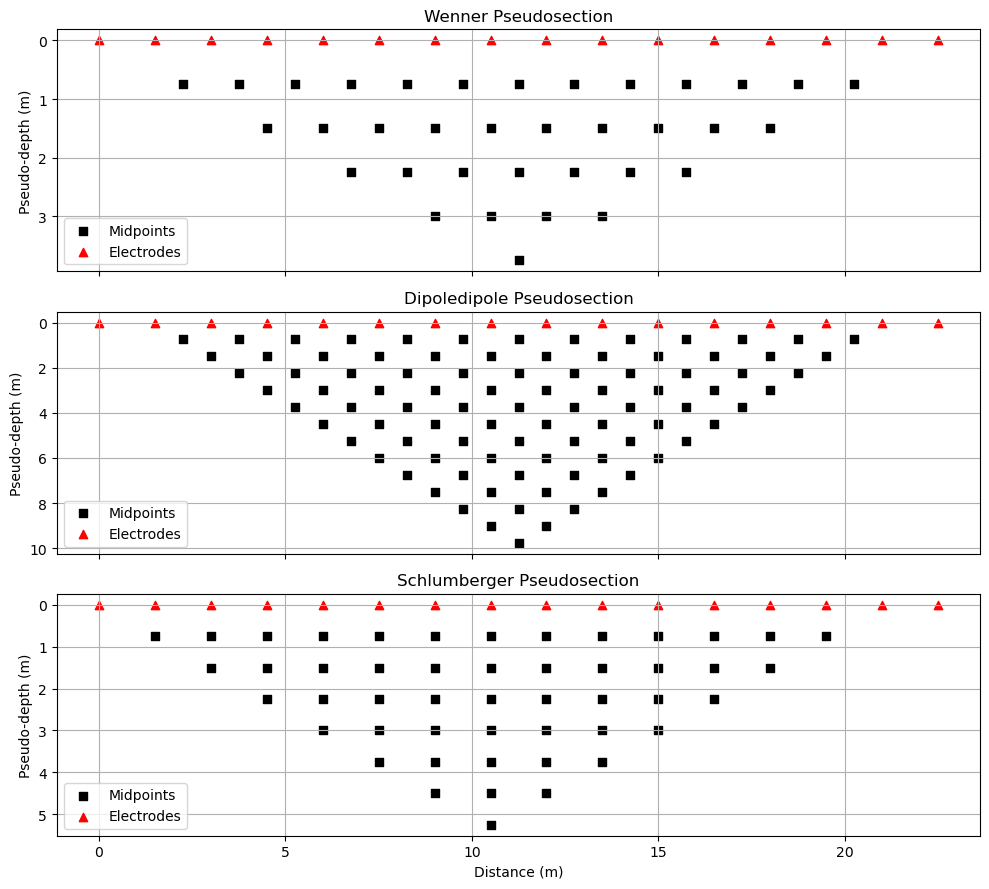

In [16]:
a = 1.5 #spacing between electrodes, in meters
x0 = 0 #Initial location of electrode spread
array_fig_path = f"pseudosections_arrays.png"
num_electrodes = len(geometry) # change this value to simulate different number of electrodes


ert.plot_all_pseudosections(a=a,num_electrodes=num_electrodes,x0=x0,
                        show_electrodes=True,
                        use_pseudodepth=True,
                        save_path=array_fig_path)


## Data analysis

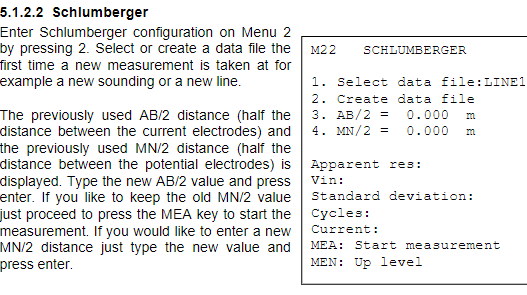

**Next analysis is just an approximation (Depth Scaling). The proper way is by doing an inversion**

- Midpoint of the array: It is calculated by averaging the x-coordinates of the four electrodes (A, B, M, and N), which serves as the representative horizontal location for the resistivity measurement. The distance between the current electrodes A and B is calculated using the 3D Euclidean formula, reflecting the true electrode spacing in space. 

- To estimate the depth of investigation, the code multiplies the AB spacing by 0.25—an empirical factor widely accepted in Schlumberger array surveys, where the depth of current penetration is roughly one-fourth the AB distance.


In [20]:
import numpy as np

stg = stg[stg['resistivity'] > 0]  # Filter out negative resistivity values

# Midpoint in x
stg['x_mid'] = (stg['Ax'] + stg['Bx'] + stg['Mx'] + stg['Nx']) / 4
# Euclidean distance AB (distance between A and B in 3D)
stg['AB'] = np.sqrt((stg['Ax'] - stg['Bx'])**2 + (stg['Ay'] - stg['By'])**2 + (stg['Az'] - stg['Bz'])**2)
# The factor 0.25 (1/4) is an empirical constant used with Schlumberger arrays.
stg['depth'] = stg['AB'] * 0.25

res = stg['resistivity'] 

# Coordinates
x = stg['x_mid']
z = stg['depth']

print(stg[['x_mid','depth']].head())
print(stg[['x_mid','depth']].describe())

   x_mid  depth
0   2.25  0.375
1   3.00  0.375
2   3.75  0.375
3   4.50  0.375
4   5.25  0.375
            x_mid       depth
count  165.000000  165.000000
mean    11.190909    1.109091
std      4.104568    1.068193
min      2.250000    0.375000
25%      8.250000    0.375000
50%     11.250000    0.750000
75%     14.250000    1.125000
max     20.250000    5.250000


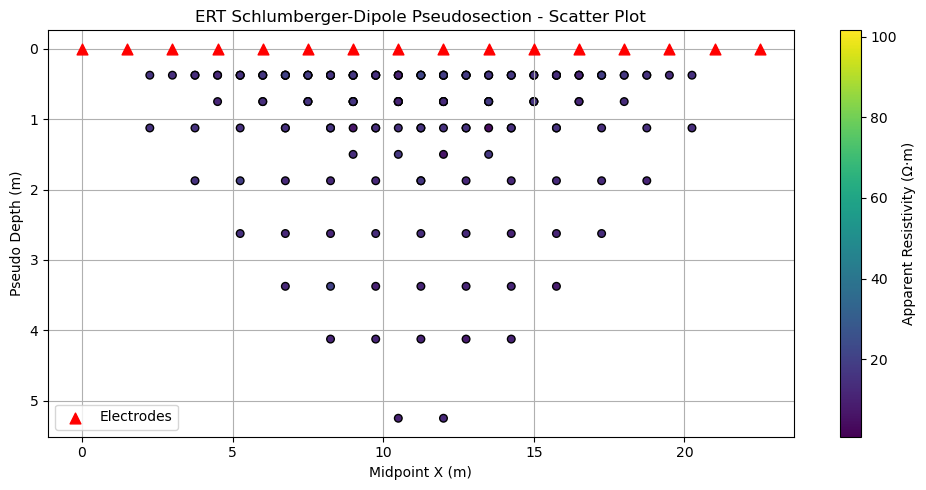

In [23]:
pseudosection_path = "pseudosection_scatter.png"

plt.figure(figsize=(10, 5))

# Scatter plot of resistivity values
sc = plt.scatter(x, z, c=res, cmap='viridis', s=30, edgecolor='k')  # s is marker size
plt.gca().invert_yaxis()
plt.colorbar(sc, label='Apparent Resistivity (Ω·m)')
plt.xlabel("Midpoint X (m)")
plt.ylabel("Pseudo Depth (m)")
plt.title("ERT Schlumberger-Dipole Pseudosection - Scatter Plot")
plt.grid(True)

# Add electrode positions (assuming on surface, z=0)
electrode_x = np.concatenate([stg['Ax'], stg['Bx'], stg['Mx'], stg['Nx']])
electrode_x_unique = np.unique(electrode_x)
electrode_z_unique = np.zeros_like(electrode_x_unique)
plt.scatter(electrode_x_unique, electrode_z_unique, c='red', marker='^', s=60, label='Electrodes', zorder=10)

plt.legend()
plt.tight_layout()
plt.savefig(pseudosection_path, dpi=300)
plt.show()

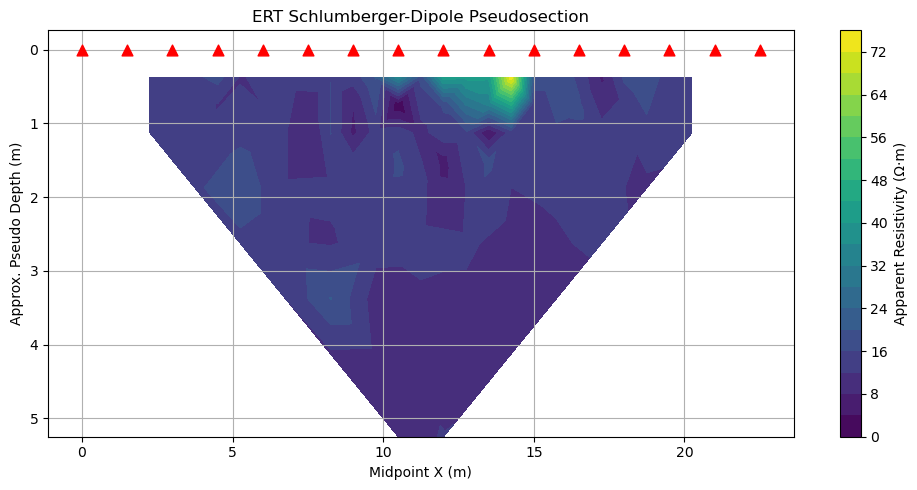

In [24]:
import numpy as np
import matplotlib.tri as tri

pseudosection_path = "pseudosection_interp.png"

# Triangulation
triang = tri.Triangulation(x, z)


# Plot
plt.figure(figsize=(10, 5))
tpc = plt.tricontourf(triang, res, levels=20, cmap='viridis')

# Add electrode positions (assuming on surface, z=0)
electrode_x = np.concatenate([stg['Ax'], stg['Bx'], stg['Mx'], stg['Nx']])
electrode_x_unique = np.unique(electrode_x)
electrode_z_unique = np.zeros_like(electrode_x_unique)
plt.scatter(electrode_x_unique, electrode_z_unique, c='red', marker='^', s=60, label='Electrodes', zorder=10)


plt.gca().invert_yaxis()
plt.colorbar(tpc, label='Apparent Resistivity (Ω·m)')
plt.xlabel("Midpoint X (m)")
plt.ylabel("Approx. Pseudo Depth (m)")
plt.title("ERT Schlumberger-Dipole Pseudosection")
plt.grid(True)
plt.tight_layout()
plt.savefig(pseudosection_path, dpi=300)
plt.show()

🧠 **Depth values** (Think of it like this):
- It does not reflect the true depth of subsurface features. But it does provide a consistent and qualitative depth scale, enough for visualizing changes and anomalies with depth.

- It's a "pseudo" depth, not a geologically accurate one.

- You can say: "this anomaly is deeper than that one," but not exactly: "this anomaly is exactly at 0.6 meters."


🧠 **Resisitivity values**:
The resistivity values from 0 to ~72 Ω·m are typical for near-surface investigations (0–5 m depth), depending on your site conditions. Considering our area it's likely to have mostly clay or wet soil.

![res](Resistivity-ranges.jpg) 

